In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
#Reading the dataset.
df = pd.read_excel('online_retail_II.xlsx', sheet_name="Year 2010-2011")

In [3]:
#Copying the dataset.
dfCopy = df.copy()

In [4]:
dfCopy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
dfCopy.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
#Checking null variables.
dfCopy.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
#Removing null variables.
dfCopy.dropna(thresh=None, subset=None, inplace=True)

In [8]:
print(dfCopy.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [9]:
dfCopy.shape

(406830, 8)

In [10]:
dfCopy = dfCopy[~dfCopy["Invoice"].str.contains("C", na=False)]

In [11]:
dfCopy.shape

(397925, 8)

In [12]:
dfCopy = dfCopy[dfCopy["Quantity"] > 0]

In [30]:
dfCopy = dfCopy[dfCopy['Country'] == 'United Kingdom']

In [32]:
dfCopy.shape

(354345, 9)

In [31]:
dfCopy.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,354345.0,10.811026,23.613630,1.0,1.00,2.00,4.00,12.00,100.00,298.500
Price,354345.0,2.821367,2.987790,0.0,0.21,1.25,1.95,3.75,12.75,37.060
Customer ID,354345.0,15552.436219,1594.546025,12346.0,12748.00,14194.00,15522.00,16931.00,18223.00,18287.000
TotalPrice,354345.0,18.851951,50.043247,0.0,0.55,4.16,10.20,17.70,177.60,3268.575


In [33]:
#Defining functions for outliers.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [34]:
#Defining functions to replace outliers.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    #dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [35]:
#Replacing outliers in the Quantity and Price columns with the upper limit.
replace_with_thresholds(dfCopy, "Quantity")
replace_with_thresholds(dfCopy, "Price")

dfCopy.describe([0.01,0.25,0.50,0.75,0.99]).T

C:\Users\seda.sezgin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\seda.sezgin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,354345.0,10.676869,22.075531,1.0,1.00,2.00,4.00,12.00,100.00,248.500
Price,354345.0,2.815039,2.920551,0.0,0.21,1.25,1.95,3.75,12.75,31.560
Customer ID,354345.0,15552.436219,1594.546025,12346.0,12748.00,14194.00,15522.00,16931.00,18223.00,18287.000
TotalPrice,354345.0,18.851951,50.043247,0.0,0.55,4.16,10.20,17.70,177.60,3268.575


In [36]:
#Calculating total price per transaction.
dfCopy["TotalPrice"] = dfCopy["Quantity"] * dfCopy["Price"]

<ipython-input-36-a0c516d4bac6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy["TotalPrice"] = dfCopy["Quantity"] * dfCopy["Price"]


In [49]:
dfCopy.sort_values(by = 'TotalPrice', ascending = False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
23263,538191,22423,REGENCY CAKESTAND 3 TIER,248.5,2010-12-10 10:49:00,10.95,15061.0,United Kingdom,2721.075
411235,572209,23557,LANDMARK FRAME BAKER STREET,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
411234,572209,23553,LANDMARK FRAME CAMDEN TOWN,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
411229,572209,23556,LANDMARK FRAME COVENT GARDEN,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
411230,572209,23554,LANDMARK FRAME OXFORD STREET,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
...,...,...,...,...,...,...,...,...,...
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2011-02-10 13:08:00,0.00,17560.0,United Kingdom,0.000
485985,577696,M,Manual,1.0,2011-11-21 11:57:00,0.00,16406.0,United Kingdom,0.000
446125,574879,22625,RED KITCHEN SCALES,2.0,2011-11-07 13:22:00,0.00,13014.0,United Kingdom,0.000
187613,553000,47566,PARTY BUNTING,4.0,2011-05-12 15:21:00,0.00,17667.0,United Kingdom,0.000


In [38]:
#Defining today date as max(InvoiceDate) + 2 days.
dfCopy["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)
print(f" Maximum invoice date: {dfCopy.InvoiceDate.max()} \n Today date: {today_date}")

 Maximum invoice date: 2011-12-09 12:49:00 
 Today date: 2011-12-11 00:00:00


In [39]:
#Calculating recency metric.
dfCopy.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days})

,InvoiceDate
Customer ID,
12346.0,326
12747.0,3
12748.0,1
12749.0,4
12820.0,4
...,...
18280.0,278
18281.0,181
18282.0,8


In [40]:
#Calculating frequency metric.
dfCopy.groupby('Customer ID').agg({'Invoice': lambda num: num.nunique()})

,Invoice
Customer ID,
12346.0,1
12747.0,11
12748.0,210
12749.0,5
12820.0,4
...,...
18280.0,1
18281.0,1
18282.0,2


In [41]:
#Calculating monetary metric.
dfCopy.groupby('Customer ID').agg({"TotalPrice": lambda price: price.sum()})

,TotalPrice
Customer ID,
12346.0,258.44
12747.0,4196.01
12748.0,32303.91
12749.0,4072.44
12820.0,942.34
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [42]:
#Assigning your calculated metrics to a variable named rfm.
rfm = dfCopy.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda price: price.sum()})

In [43]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,1,258.44
12747.0,3,11,4196.01
12748.0,1,210,32303.91
12749.0,4,5,4072.44
12820.0,4,4,942.34


In [44]:
#Changing the names of the metrics we created as recency, frequency and monetary.
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,258.44
12747.0,3,11,4196.01
12748.0,1,210,32303.91
12749.0,4,5,4072.44
12820.0,4,4,942.34


In [45]:
#Calculating average monetary values per order.
rfm["monetary"] = rfm["monetary"] / rfm["frequency"]
#Removing one-time purchases from dataset.
rfm = rfm[(rfm['frequency'] > 1)]
#Copying dataset.
cltv = rfm.copy()

In [46]:
cltv.head()

,recency,frequency,monetary
Customer ID,,,
12747.0,3,11,381.455455
12748.0,1,210,153.828143
12749.0,4,5,814.488000
12820.0,4,4,235.585000
12822.0,71,2,474.440000


In [48]:
cltv.shape

(2570, 3)

In [50]:
cltv.describe([0.01,0.25, 0.50, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
recency,2570.0,59.208949,69.963314,1.00,1.00000,11.000000,31.00,75.000000,307.620000,374.000000
frequency,2570.0,5.952529,8.412724,2.00,2.00000,2.000000,4.00,6.000000,37.000000,210.000000
monetary,2570.0,344.130219,276.252897,3.45,49.45135,186.749375,289.11,415.880833,1495.901191,3859.601538


In [52]:
#Changing the names of the metrics we created as total_transaction, total_unit and total_price.
cltv.columns = ['total_transaction', 'total_unit', 'total_price']
cltv.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12747.0,3,11,381.455455
12748.0,1,210,153.828143
12749.0,4,5,814.488000
12820.0,4,4,235.585000
12822.0,71,2,474.440000


In [54]:
#Remembering required formulas for Customer Lifetime Value Calculation:
#Average_Order_Value = total_price / total_transaction
#Purchase_Frequency = total_transaction / Total_Number_of_Customers
#Customer_Value = Average_Order_Value * Purchase_Frequency
#Churn_Rate = 1 - Repeat_Rate
#Profit_margin = total_price * 0.10
#cltv = (Customer_Value / Churn_Rate) * Profit_margin

In [55]:
cltv["Average_Order_Value"] = cltv["total_price"] / cltv["total_transaction"]

In [56]:
#Total_Number_of_Customers:
cltv.shape[0]

cltv["Purchase_Frequency"] = cltv["total_transaction"] / cltv.shape[0]

In [57]:
Repeat_Rate = cltv[cltv.total_transaction > 1].shape[0] / cltv.shape[0]

Churn_Rate = 1 - Repeat_Rate

In [58]:
#Profit margin : 10 %
cltv["Profit_margin"] = cltv["total_price"] * 0.10
cltv.head()

,total_transaction,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin
Customer ID,,,,,,
12747.0,3,11,381.455455,127.151818,0.001167,38.145545
12748.0,1,210,153.828143,153.828143,0.000389,15.382814
12749.0,4,5,814.488000,203.622000,0.001556,81.448800
12820.0,4,4,235.585000,58.896250,0.001556,23.558500
12822.0,71,2,474.440000,6.682254,0.027626,47.444000


In [59]:
#RFM tablosuna benzer tablomuzu oluşturuyoruz.
rfm = dfCopy.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [60]:
#Hiyerarşik index yapısı oluştuğundan dolayı onu ortadan kaldırıyoruz.
rfm.columns = rfm.columns.droplevel(0)

In [61]:
rfm.head()

,<lambda_0>,<lambda_1>,<lambda>,<lambda>
Customer ID,,,,
12346.0,0,326,1,258.44
12747.0,366,370,11,4196.01
12748.0,372,374,210,32303.91
12749.0,209,214,5,4072.44
12820.0,323,327,4,942.34


In [62]:
# Değişkenler lambda olarak geldiği için sütunları tekrar isimlendiriyoruz. 
rfm.columns = ['recency_cltv_p', 'T', 'frequency', 'monetary']

In [63]:
# Gamma gamma modeli klasik monetary değerini değil, ortalama monetary değerini ister.
# Her bir işlemde(Frequency) müşteri ortalama ne kadar bırakmış?
# Her bir müşteri, her bir faturada ortalama ne kadar kazandırmış?
rfm["monetary"] = rfm["monetary"] / rfm["frequency"]

In [64]:
# monetary değeri Gamma-Gamma modeline uygun hale geldi.
rfm.head()

,recency_cltv_p,T,frequency,monetary
Customer ID,,,,
12346.0,0,326,1,258.440000
12747.0,366,370,11,381.455455
12748.0,372,374,210,153.828143
12749.0,209,214,5,814.488000
12820.0,323,327,4,235.585000


In [ ]:
# Gamma-Gamma modeli için yapmış olduğumuz değişikliğin farkedilmesi açısından monetary değerini de monetary_avg olarak değiştiriyoruz. 
rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)

# Calculations for Weekly Values

In [66]:
# BGNB Modeli için haftalık Recency (recency_weekly_p) ve haftalık Tenure (T_weekly) değerlerini hesaplıyoruz.
# Bu değerler kaç hafta önce alışveriş yaptığı ve kaç haftalık müşteri olduğu bilgisini veriyor.
# Kaç hafta önce alışveriş yaptığı:
rfm["recency_weekly_cltv_p"] = rfm["recency_cltv_p"] / 7  
# Kaç haftalık müşteri olduğu:
rfm["T_weekly"] = rfm["T"] / 7  

In [67]:
# Kontrol için monetary_avg değerlerinin "0" dan büyük olanları alıyoruz.
rfm = rfm[rfm["monetary_avg"] > 0]

In [68]:
# Daha sağlıklı bir CLTV hesabı için; 
rfm = rfm[(rfm['frequency'] > 1)]

In [69]:
rfm.head()

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly
Customer ID,,,,,,
12747.0,366,370,11,381.455455,52.285714,52.857143
12748.0,372,374,210,153.828143,53.142857,53.428571
12749.0,209,214,5,814.488000,29.857143,30.571429
12820.0,323,327,4,235.585000,46.142857,46.714286
12822.0,16,88,2,474.440000,2.285714,12.571429


In [70]:
# BG-NBD ve Gamma-Gamma modelleri frequency değerini float istemiyor.
# O yüzden kontrol amaçlı frequency tipini integer yapıyoruz.
rfm["frequency"] = rfm["frequency"].astype(int)

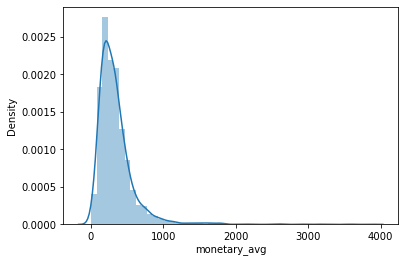

In [81]:
ax = sns.distplot(rfm['monetary_avg'])

# BG-NBD Model (Expected number of transaction)  

In [74]:
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [82]:
# BG-NBD modelinin fit edilmesi ile beklenen cltv satış adetlerinin tahminleme adımına geçebiliriz. 
bgf = BetaGeoFitter(penalizer_coef=0.001)
    
bgf.fit(rfm['frequency'],
        rfm['recency_weekly_cltv_p'],
        rfm['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 2570 subjects, a: 0.12, alpha: 11.66, b: 2.51, r: 2.21>

In [85]:
#Who are the 10 customers we expect the most to purchase in a week?
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        rfm['frequency'],
                                                        rfm['recency_weekly_cltv_p'],
                                                        rfm['T_weekly']).sort_values(ascending=False).head(10)


rfm["expected_purc_1_week"] = bgf.predict(1,
                                              rfm['frequency'],
                                              rfm['recency_weekly_cltv_p'],
                                              rfm['T_weekly'])
rfm.sort_values("expected_purc_1_week", ascending=False).head(10)

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly,exp_sales_1_month,expected_purc_1_week
Customer ID,,,,,,,,
12748.0,372,374,210,153.828143,53.142857,53.428571,13.440141,3.252952
17841.0,371,374,124,328.822339,53.000000,53.428571,7.979729,1.933252
13089.0,366,370,97,605.186598,52.285714,52.857143,6.321999,1.532019
14606.0,372,374,93,129.961613,53.142857,53.428571,6.014149,1.458797
15311.0,373,374,91,667.596813,53.285714,53.428571,5.888278,1.428625
12971.0,368,373,86,127.049826,52.571429,53.285714,5.577810,1.352266
13408.0,371,374,62,453.281935,53.000000,53.428571,4.045456,0.982914
18102.0,366,368,60,3584.887750,52.285714,52.571429,3.973328,0.965291
13798.0,370,373,57,650.511140,52.857143,53.285714,3.736590,0.908239


In [86]:
#Who are the 10 customers we expect the most to purchase in a month?
bgf.predict(4,
            rfm['frequency'],
            rfm['recency_weekly_cltv_p'],
            rfm['T_weekly']).sort_values(ascending=False).head(10)


rfm["expected_purc_1_month"] = bgf.predict(4,
                                               rfm['frequency'],
                                               rfm['recency_weekly_cltv_p'],
                                               rfm['T_weekly'])


rfm.sort_values("expected_purc_1_month", ascending=False).head(10)

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly,exp_sales_1_month,expected_purc_1_week,expected_purc_1_month
Customer ID,,,,,,,,,
12748.0,372,374,210,153.828143,53.142857,53.428571,13.440141,3.252952,12.977515
17841.0,371,374,124,328.822339,53.000000,53.428571,7.979729,1.933252,7.712588
13089.0,366,370,97,605.186598,52.285714,52.857143,6.321999,1.532019,6.111736
14606.0,372,374,93,129.961613,53.142857,53.428571,6.014149,1.458797,5.819756
15311.0,373,374,91,667.596813,53.285714,53.428571,5.888278,1.428625,5.699386
12971.0,368,373,86,127.049826,52.571429,53.285714,5.577810,1.352266,5.394723
13408.0,371,374,62,453.281935,53.000000,53.428571,4.045456,0.982914,3.921229
18102.0,366,368,60,3584.887750,52.285714,52.571429,3.973328,0.965291,3.850788
13798.0,370,373,57,650.511140,52.857143,53.285714,3.736590,0.908239,3.623295


In [76]:
# 1 aylık beklenen satışların tahminini veren kod:
# recency_weekly_cltv_p ve T_weekly değerini haftalık değere çevirdiğimiz için modelde 4 yazmamız bize 1 aylık beklenen cltv satışları verir.
rfm["exp_sales_1_month"] = bgf.predict(4,
                                        rfm['frequency'],
                                        rfm['recency_weekly_cltv_p'],
                                        rfm['T_weekly'])

In [87]:
# 6 aylık beklenen cltv satışların tahminini veren kod.
rfm["exp_sales_6_month"] = bgf.predict(24,
                                        rfm['frequency'],
                                        rfm['recency_weekly_cltv_p'],
                                        rfm['T_weekly'])

In [88]:
# Müşterilerin geleceğe yönelik 1 ve 3 aylık periyotta beklenen satışlarını tabloda görüyoruz.
rfm.head()

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly,exp_sales_1_month,expected_purc_1_week,expected_purc_1_month,exp_sales_6_month
Customer ID,,,,,,,,,,
12747.0,366,370,11,381.455455,52.285714,52.857143,0.815252,0.202479,0.807679,4.766765
12748.0,372,374,210,153.828143,53.142857,53.428571,13.440141,3.252952,12.977515,76.643827
12749.0,209,214,5,814.488000,29.857143,30.571429,0.668677,0.167149,0.665729,3.898353
12820.0,323,327,4,235.585000,46.142857,46.714286,0.405900,0.103972,0.414566,2.441310
12822.0,16,88,2,474.440000,2.285714,12.571429,0.528305,0.129141,0.512653,2.958329


# GAMMA-GAMMA Model (Expected Average Profit)

In [89]:
# Gamma-Gamma modelinin fit edilmesi ile beklenen karlılık tahminleme adımına geçebiliriz. 
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(rfm['frequency'], rfm['monetary_avg'])

# Top 10 most profitable customers:
ggf.conditional_expected_average_profit(rfm['frequency'],
                                        rfm['monetary_avg']).sort_values(ascending=False).head(10)

rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                         rfm['monetary_avg'])
rfm.sort_values("expected_average_profit", ascending=False).head(10)

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly,exp_sales_1_month,expected_purc_1_week,expected_purc_1_month,exp_sales_6_month,expected_average_profit
Customer ID,,,,,,,,,,,
14088.0,312,323,13,3859.601538,44.571429,46.142857,1.055357,0.259732,1.035750,6.103208,3911.318850
18102.0,366,368,60,3584.887750,52.285714,52.571429,3.973328,0.965291,3.850788,22.736008,3595.192557
14096.0,97,102,17,3159.077059,13.857143,14.571429,3.096898,0.723053,2.873545,16.661604,3191.386734
17511.0,370,374,31,2921.951935,52.857143,53.428571,2.077455,0.507374,2.024069,11.951480,2938.274487
15749.0,97,333,3,2521.446667,13.857143,47.571429,0.142650,0.028381,0.113163,0.666393,2675.118999
17450.0,359,368,46,2629.529891,51.285714,52.571429,3.066626,0.745075,2.972272,17.548364,2639.419342
13081.0,359,372,11,2575.622727,51.285714,53.142857,0.810093,0.200947,0.801576,4.731047,2616.624391
16984.0,41,131,2,2240.675000,5.857143,18.714286,0.420617,0.103307,0.410693,2.384439,2452.124911
16000.0,0,3,3,2055.786667,0.000000,0.428571,1.874137,0.416012,1.640945,9.260343,2181.323596


# Calculation CLTV with BG-NBD and GAMMA-GAMMA Models

In [93]:
# Müşterilerin 6 aylık CLTV_p değerini hesaplıyoruz
cltv = ggf.customer_lifetime_value(bgf,
                                    rfm['frequency'],
                                    rfm['recency_weekly_cltv_p'],
                                    rfm['T_weekly'],
                                    rfm['monetary_avg'],
                                    time=6,
                                    freq="W",
                                    discount_rate=0.01)

In [94]:
rfm["cltv_p"] = cltv
cltv.head()
cltv = cltv.reset_index()
cltv.sort_values(by= "clv", ascending=False).head()

# 50 most valuable customers in a 6-month
cltv.sort_values(by="clv", ascending=False).head(20)

,Customer ID,clv
2486,18102.0,85651.010467
589,14096.0,55650.646773
2184,17450.0,48533.310108
2213,17511.0,36797.006732
1804,16684.0,25083.025410
406,13694.0,25060.708710
587,14088.0,25010.059127
1173,15311.0,23591.389482
133,13089.0,22927.692955
1057,15061.0,21123.082064


In [95]:
#Analyze the top 10 people at 1 month CLTV and the 10 highest at 12 months.
a =ggf.customer_lifetime_value(bgf,
                                   rfm['frequency'],
                                   rfm['recency_weekly_cltv_p'],
                                   rfm['T_weekly'],
                                   rfm['monetary_avg'],
                                   time=1,  # 1 month
                                   freq="W",  # Weekly
                                   discount_rate=0.01)

b =ggf.customer_lifetime_value(bgf,
                                   rfm['frequency'],
                                   rfm['recency_weekly_cltv_p'],
                                   rfm['T_weekly'],
                                   rfm['monetary_avg'],
                                   time=12,  # 12 month
                                   freq="W",  # Weekly
                                   discount_rate=0.01)

In [96]:
# Her bir müşteri için cltv_p tahminini hesaplamış olduk.
# 1-100 arasında puanlayarak daha iyi okunabilmesini sağlayalım.
scaler = MinMaxScaler(feature_range=(1, 100))
scaler.fit(rfm[["cltv_p"]])
rfm["cltv_p"] = scaler.transform(rfm[["cltv_p"]])

In [97]:
# 1-100 arasındaki cltv_p değerlerini segmentlere ayırıyoruz.
rfm["cltv_p_segment"] = pd.qcut(rfm["cltv_p"], 4, labels=["D", "C", "B", "A"])

In [98]:
#6 aylık CLTV Prediction segmentlerini de oluşturmuş olduk.
rfm.head()

,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly,exp_sales_1_month,expected_purc_1_week,expected_purc_1_month,exp_sales_6_month,expected_average_profit,cltv_p,cltv_p_segment
Customer ID,,,,,,,,,,,,,
12747.0,366,370,11,381.455455,52.285714,52.857143,0.815252,0.202479,0.807679,4.766765,387.822846,3.238941,A
12748.0,372,374,210,153.828143,53.142857,53.428571,13.440141,3.252952,12.977515,76.643827,153.971325,15.293046,A
12749.0,209,214,5,814.488000,29.857143,30.571429,0.668677,0.167149,0.665729,3.898353,844.094697,4.983082,A
12820.0,323,327,4,235.585000,46.142857,46.714286,0.405900,0.103972,0.414566,2.441310,247.080949,1.730429,C
12822.0,16,88,2,474.440000,2.285714,12.571429,0.528305,0.129141,0.512653,2.958329,520.828195,2.863347,B


In [100]:
# Müşterilerimizle ilgili detaylı kararlar alabilmek için çıktıları birleştiriyoruz.
crm_final = cltv.merge(rfm, on="Customer ID", how="left")

In [101]:
crm_final.head(10)

,Customer ID,clv,recency_cltv_p,T,frequency,monetary_avg,recency_weekly_cltv_p,T_weekly,exp_sales_1_month,expected_purc_1_week,expected_purc_1_month,exp_sales_6_month,expected_average_profit,cltv_p,cltv_p_segment
0,12747.0,1937.046140,366,370,11,381.455455,52.285714,52.857143,0.815252,0.202479,0.807679,4.766765,387.822846,3.238941,A
1,12748.0,12365.796180,372,374,210,153.828143,53.142857,53.428571,13.440141,3.252952,12.977515,76.643827,153.971325,15.293046,A
2,12749.0,3446.010436,209,214,5,814.488000,29.857143,30.571429,0.668677,0.167149,0.665729,3.898353,844.094697,4.983082,A
3,12820.0,631.939332,323,327,4,235.585000,46.142857,46.714286,0.405900,0.103972,0.414566,2.441310,247.080949,1.730429,C
4,12822.0,1612.096652,16,88,2,474.440000,2.285714,12.571429,0.528305,0.129141,0.512653,2.958329,520.828195,2.863347,B
5,12823.0,1095.508457,221,297,5,351.900000,31.571429,42.428571,0.495251,0.122133,0.486879,2.864079,365.132556,2.266247,B
6,12826.0,757.014438,362,366,7,210.674286,51.714286,52.285714,0.563916,0.141820,0.565672,3.337204,216.496557,1.874998,C
7,12827.0,1009.143723,38,45,3,143.383333,5.428571,6.428571,1.168655,0.277511,1.099268,6.291455,153.371927,2.166422,B
8,12828.0,1125.113591,127,131,6,169.785000,18.142857,18.714286,1.090417,0.265027,1.053936,6.127787,175.407054,2.300466,B
9,12829.0,16.110813,23,361,2,138.110000,3.285714,51.571429,0.021687,0.004275,0.017048,0.100462,153.066813,1.018622,D


In [104]:
#Segment-based customer descriptive statistics:
crm_final.groupby("cltv_p_segment").agg(
    {"count", "mean", "sum"})

Customer ID                             clv                \
                     count         sum          mean count           sum   
cltv_p_segment                                                             
D                      643  10099073.0  15706.178849   643  1.732673e+05   
C                      642   9964742.0  15521.404984   642  4.563488e+05   
B                      642  10012848.0  15596.336449   642  8.162086e+05   
A                      643   9896309.0  15390.838258   643  2.447482e+06   

                            recency_cltv_p                         T  ...  \
                       mean          count     sum        mean count  ...   
cltv_p_segment                                                        ...   
D                269.467048            643   99324  154.469673   643  ...   
C                710.823704            642  138579  215.855140   642  ...   
B               1271.352896            642  134096  208.872274   642  ...   
A               3806.348972            643  141604  220.223950   643  ...   

               expected_purc_1_month exp_sales_6_month                         \
                                mean             count          sum      mean   
cltv_p_segment                                                                  
D                           0.282850               643  1065.516734  1.657102   
C                           0.475923               642  1789.065393  2.786706   
B                           0.642498               642  2410.293721  3.754352   
A                           1.084563               643  4080.612220  6.346209   

               expected_average_profit                            cltv_p  \
                                 count            sum        mean  count   
cltv_p_segment                                                             
D                                  643  123598.077568  192.220960    643   
C                                  642  178520.780916  278.069752    642   
B                                  642  237858.161456  370.495579    642   
A                                  643  391391.925215  608.696618    643   

                                       
                        sum      mean  
cltv_p_segment                         
D                843.271588  1.311464  
C               1169.472271  1.821608  
B               1585.417327  2.469497  
A               3471.930507  5.399581  

[4 rows x 42 columns]